# T2 - 3 Data Cleaning

 Agregar datos

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
gender =['Male','Female']
income =['Poor','Middle Class','Rich']

In [49]:
n = 500
gender_data =[]
income_data =[]

for i in range(n):
    gender_data.append(np.random.choice(gender)) 
    income_data.append(np.random.choice(income))

In [50]:
gender_data[:10]

['Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male']

In [51]:
height= 162 +30*np.random.randn(n)
weigth = 65 +25 * np.random.rand(n)
age = 30 +12 *np.random.rand(n)
income = 18000 + 3500 *np.random.rand(n)

In [52]:
data = pd.DataFrame({
    'Gender':gender_data,
    'Economic_Status':income_data,
    'Height':height,
    'Weight':weigth,
    'Age':age,
    'income':income_data
})

In [53]:
data.head()

,Gender,Economic_Status,Height,Weight,Age,income
0,Female,Poor,136.039931,76.396602,35.208276,Poor
1,Male,Rich,161.776927,79.940290,41.117585,Rich
2,Male,Rich,134.752222,73.030616,33.240942,Rich
3,Female,Middle Class,163.033858,79.759973,31.283170,Middle Class
4,Male,Middle Class,133.967577,77.574377,34.517796,Middle Class


### agrupacion de Datos

In [54]:
grouped_gender= data.groupby('Gender')

In [55]:
grouped_gender.groups

{'Female': [0, 3, 7, 8, 10, 12, 15, 16, 17, 18, 19, 21, 23, 26, 31, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 46, 48, 49, 52, 54, 56, 58, 59, 62, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 80, 83, 86, 87, 88, 89, 94, 95, 99, 101, 103, 106, 109, 111, 112, 116, 118, 119, 122, 124, 125, 126, 128, 129, 131, 134, 135, 138, 139, 142, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 161, 162, 164, 170, 171, 174, 175, 187, 188, 189, 190, 193, 194, ...], 'Male': [1, 2, 4, 5, 6, 9, 11, 13, 14, 20, 22, 24, 25, 27, 28, 29, 30, 32, 35, 42, 45, 47, 50, 51, 53, 55, 57, 60, 61, 63, 64, 71, 73, 77, 78, 79, 81, 82, 84, 85, 90, 91, 92, 93, 96, 97, 98, 100, 102, 104, 105, 107, 108, 110, 113, 114, 115, 117, 120, 121, 123, 127, 130, 132, 133, 136, 137, 140, 141, 143, 147, 151, 156, 160, 163, 165, 166, 167, 168, 169, 172, 173, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 191, 192, 195, 196, 197, 198, 199, ...]}

In [56]:
grouped_gender.count()

,Economic_Status,Height,Weight,Age,income
Gender,,,,,
Female,239,239,239,239,239
Male,261,261,261,261,261


#  Agregar Datos

## Operaciones de datos agrupados

In [57]:
grouped_gender.sum()

,Height,Weight,Age
Gender,,,
Female,38783.989418,18472.170458,8558.419575
Male,42715.342187,20056.211772,9452.976366


In [58]:
grouped_gender.mean()

,Height,Weight,Age
Gender,,,
Female,162.276106,77.289416,35.809287
Male,163.660315,76.843723,36.218300


In [59]:
grouped_gender.size()

Gender
Female    239
Male      261
dtype: int64

In [60]:
grouped_gender.describe()

Height                                                            \
        count        mean        std        min         25%         50%   
Gender                                                                    
Female  239.0  162.276106  30.634224  83.588768  140.009855  162.141894   
Male    261.0  163.660315  30.823021  89.846484  141.921581  165.313223   

                               Weight             ...                        \
               75%         max  count       mean  ...        75%        max   
Gender                                            ...                         
Female  184.178096  248.448844  239.0  77.289416  ...  83.229778  89.823980   
Male    186.884883  242.864678  261.0  76.843723  ...  82.775170  89.890837   

          Age                                                        \
        count       mean       std        min        25%        50%   
Gender                                                                
Female  239.0  35.809287  3.320019  30.006538  33.135128  35.738104   
Male    261.0  36.218300  3.554034  30.026240  32.984962  36.721166   

                              
              75%        max  
Gender                        
Female  38.432527  41.832916  
Male    39.270748  41.989880  

[2 rows x 24 columns]

In [61]:
grouped_gender.aggregate([np.sum, np.mean])

Height                    Weight                     Age  \
                 sum        mean           sum       mean          sum   
Gender                                                                   
Female  38783.989418  162.276106  18472.170458  77.289416  8558.419575   
Male    42715.342187  163.660315  20056.211772  76.843723  9452.976366   

                   
             mean  
Gender             
Female  35.809287  
Male    36.218300

In [62]:
grouped_gender['Age'].filter(lambda x:x.sum()>2400)

0      35.208276
1      41.117585
2      33.240942
3      31.283170
4      34.517796
         ...    
495    37.063953
496    33.275253
497    32.258069
498    38.414164
499    31.719583
Name: Age, Length: 500, dtype: float64

# Transformaciones de variables

In [63]:
score = lambda x : (x - x.mean()/x.std() )

In [64]:
grouped_gender.transform(score)

,Height,Weight,Age
0,130.742714,65.066455,24.422407
1,156.467249,69.035880,30.926828
2,129.442544,62.126205,23.050185
3,157.736641,68.429826,20.497302
4,128.657899,66.669966,24.327038
...,...,...,...
495,205.071688,72.640433,26.873196
496,190.248810,66.542091,22.489384
497,165.853757,54.416004,22.067312
498,151.469588,76.495371,27.628296


# Conjunto de validacion y testing

In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('../datasets/customer-churn-model.csv')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [67]:
len(data)

3333

# Dividir utilizando distribucion normal

In [70]:
a = np.random.randn(len(data))

(array([ 16.,  61., 244., 622., 887., 829., 462., 171.,  36.,   5.]),
 array([-3.49044412, -2.7709285 , -2.05141288, -1.33189726, -0.61238164,
         0.10713399,  0.82664961,  1.54616523,  2.26568085,  2.98519647,
         3.70471209]),
 <BarContainer object of 10 artists>)

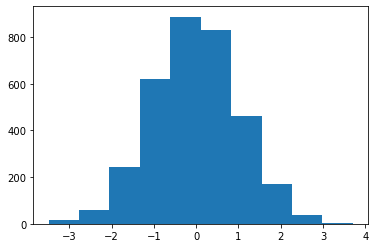

In [71]:
plt.hist(a)

In [72]:
check = (a < .8)

In [74]:
check

array([False,  True,  True, ...,  True,  True,  True])

(array([ 688.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2645.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

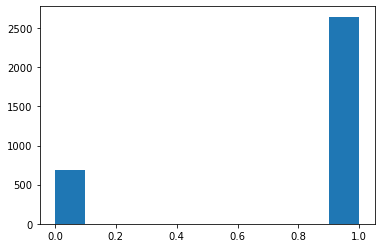

In [77]:
plt.hist(check.astype(int))

In [79]:
training = data[check]
testing = data[~check]

In [80]:
len(training)

2645

In [81]:
len(testing)

688

# Dividir Dataset usando SKLEARN 

In [82]:
from sklearn.model_selection import train_test_split


In [86]:
train, test = train_test_split(data, test_size = 0.2)

In [87]:
len(train)

2666

In [88]:
len(test)

667

# Usando funcion de shuffle

In [89]:
import sklearn.utils as sk

In [94]:
data = sk.shuffle(data)

In [98]:
cut_id = int(0.75 * len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]